# Monomial Static Model

___
<font color='blue'><center>**Carlos del-Castillo-Negrete</center></font>
    <br>
    <center>University of Texas at Austin
    <br>
    carlos.delcastillo@utexas.edu</center>
____


Consider N-dimensional where each dimension is monomial with:
   
   $$ \Large \Lambda = [-1, 1] \in \mathbb{R} $$  
   
   $$ \Large Q_i(\lambda) = \lambda_i^p \rightarrow \mathcal{D} = [-1, 1] $$
   
for each dimension $i$ and an exponent $p$.

We assume:

   $\pi_{in} \sim \mathcal{U}([-1, 1])$
  
   $\pi_{ob} \sim \mathcal{N}(0.25,0.1^2)$

# Static Models

## 1D monomial

[10/30/23 23:08:04] INFO     Logger initialized                                                           ]8;id=163766;file:///Volumes/DataDrive/repos/pyDCI/src/pydci/log.py\log.py]8;;\:]8;id=174609;file:///Volumes/DataDrive/repos/pyDCI/src/pydci/log.py#87\87]8;;\

                    INFO     Getting data for model from 0.0 to 100                                    ]8;id=394948;file:///Volumes/DataDrive/repos/pyDCI/src/pydci/Model.py\Model.py]8;;\:]8;id=552079;file:///Volumes/DataDrive/repos/pyDCI/src/pydci/Model.py#389\389]8;;\

                    INFO     Drawing 10000 from uniform at:                                            ]8;id=810765;file:///Volumes/DataDrive/repos/pyDCI/src/pydci/Model.py\Model.py]8;;\:]8;id=813376;file:///Volumes/DataDrive/repos/pyDCI/src/pydci/Model.py#584\584]8;;\
                                     loc: [0.37892914]                                                             
                                     scale: [0.75785828]                                                           

                    INFO     Beginning forward solve from 0.0 to 100.0                                 ]8;id=62233;file:///Volumes/DataDrive/repos/pyDCI/src/pydci/Model.py\Model.py]8;;\:]8;id=272080;file:///Volumes/DataDrive/repos/pyDCI/src/pydci/Model.py#457\457]8;;\

<Axes: title={'center': 'State 0 Temporal Evolution'}, xlabel='Time Step', ylabel='State 0'>

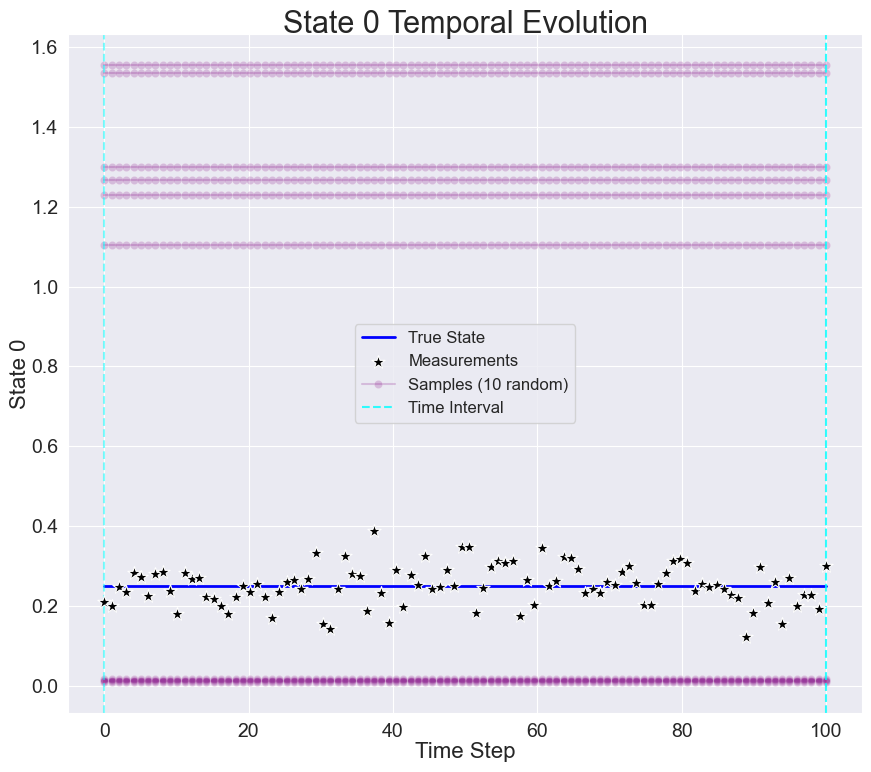

In [77]:
import pandas as pd, numpy as np
from pydci.log import enable_log, disable_log
import pydci.examples.monomial as mon
import importlib

importlib.reload(mon)

std_dev = 0.05
num_data = 100


enable_log(level="INFO")

# * Initialize Problem
mm1 = mon.Monomial1D(
        5,
        x0=[0],  # Note in the constant monomial case, initial state won't matter
        lam_true=[0.25**0.2],  # True observed value should be at 0.25
        solve_ts=1.0,
        sample_ts=1.0,
        measurement_noise=std_dev,
)

# * Pull synthetic data
mm1.get_data(t0=0.0, tf=num_data)

# * Forward solve samples from an initial
pi_in, samples = mm1.get_uniform_initial_samples(num_samples=int(1e4), scale=0.5)
mm1.forward_solve(samples=samples)

# * Plot true, observe, and predicted states
mm1.plot_state()

In [78]:
mm1.samples

[         lam_0   q_lam_0   q_lam_1   q_lam_2   q_lam_3   q_lam_4   q_lam_5  \
 0     0.839598  0.417212  0.417212  0.417212  0.417212  0.417212  0.417212   
 1     0.636849  0.104757  0.104757  0.104757  0.104757  0.104757  0.104757   
 2     1.134120  1.876267  1.876267  1.876267  1.876267  1.876267  1.876267   
 3     0.940421  0.735550  0.735550  0.735550  0.735550  0.735550  0.735550   
 4     0.549109  0.049922  0.049922  0.049922  0.049922  0.049922  0.049922   
 ...        ...       ...       ...       ...       ...       ...       ...   
 9995  0.885848  0.545502  0.545502  0.545502  0.545502  0.545502  0.545502   
 9996  0.658849  0.124145  0.124145  0.124145  0.124145  0.124145  0.124145   
 9997  1.038723  1.209202  1.209202  1.209202  1.209202  1.209202  1.209202   
 9998  0.665556  0.130594  0.130594  0.130594  0.130594  0.130594  0.130594   
 9999  0.988920  0.945815  0.945815  0.945815  0.945815  0.945815  0.945815   
 
        q_lam_6   q_lam_7   q_lam_8  ...  q_lam_90

In [79]:
mm1.data

[            ts  shift_idx  sample_flag  lam_true_0  q_lam_true_0  q_lam_obs_0
 0     0.000000          0         True    0.757858          0.25     0.211172
 1     1.010101          0         True    0.757858          0.25     0.201626
 2     2.020202          0         True    0.757858          0.25     0.247834
 3     3.030303          0         True    0.757858          0.25     0.234554
 4     4.040404          0         True    0.757858          0.25     0.282625
 ..         ...        ...          ...         ...           ...          ...
 95   95.959596          0         True    0.757858          0.25     0.201786
 96   96.969697          0         True    0.757858          0.25     0.228438
 97   97.979798          0         True    0.757858          0.25     0.228434
 98   98.989899          0         True    0.757858          0.25     0.193302
 99  100.000000          0         True    0.757858          0.25     0.300882
 
 [100 rows x 6 columns]]

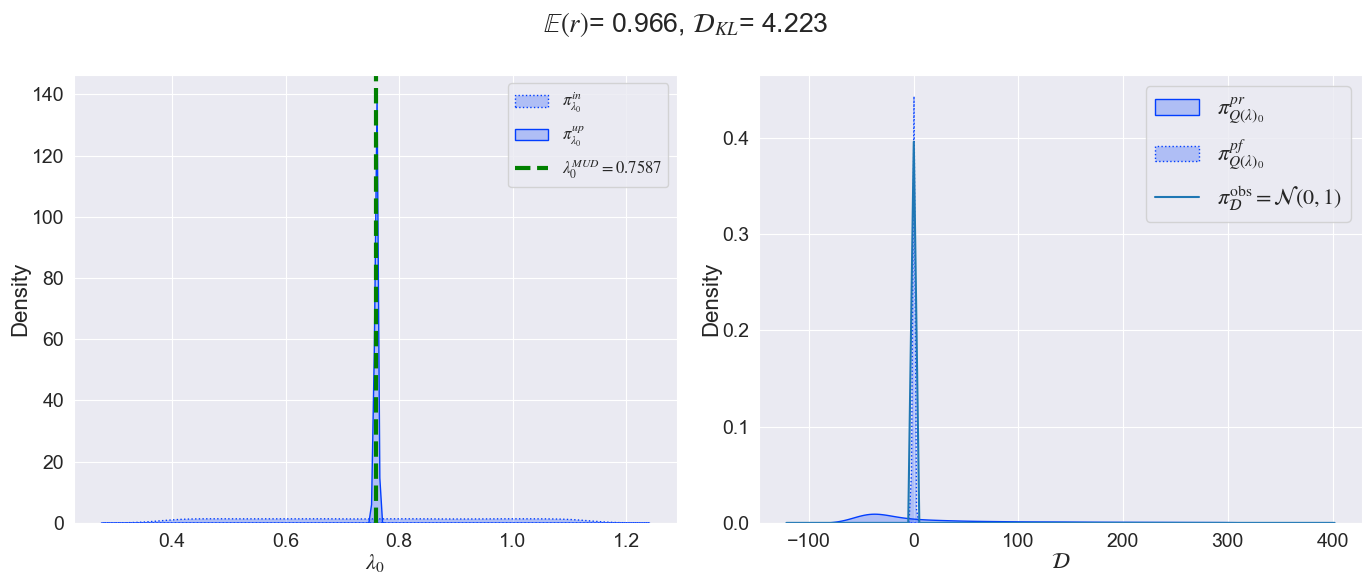

In [80]:
from pydci import PCAMUDProblem 
from scipy.stats import norm

d_prob = PCAMUDProblem(
    mm1.samples[0],
    mm1.data[0],
    std_dev=std_dev)
d_prob.solve()
_ = d_prob.density_plots()

[10/30/23 23:50:06] INFO     Logger initialized                                                           ]8;id=769887;file:///Volumes/DataDrive/repos/pyDCI/src/pydci/log.py\log.py]8;;\:]8;id=557154;file:///Volumes/DataDrive/repos/pyDCI/src/pydci/log.py#87\87]8;;\

                    INFO     Getting data for model from 0.0 to 1                                      ]8;id=338555;file:///Volumes/DataDrive/repos/pyDCI/src/pydci/Model.py\Model.py]8;;\:]8;id=894159;file:///Volumes/DataDrive/repos/pyDCI/src/pydci/Model.py#389\389]8;;\

                    INFO     Drawing 10000 from uniform at:                                            ]8;id=449310;file:///Volumes/DataDrive/repos/pyDCI/src/pydci/Model.py\Model.py]8;;\:]8;id=307753;file:///Volumes/DataDrive/repos/pyDCI/src/pydci/Model.py#584\584]8;;\
                                     loc: [0.37892914]                                                             
                                     scale: [0.75785828]                                                           

                    INFO     Beginning forward solve from 0.0 to 0.0                                   ]8;id=864632;file:///Volumes/DataDrive/repos/pyDCI/src/pydci/Model.py\Model.py]8;;\:]8;id=83972;file:///Volumes/DataDrive/repos/pyDCI/src/pydci/Model.py#457\457]8;;\

Solving model sample set: |▍                   | ▁▃▅ 176/10000 [2%] in 0s (~0s, 

[10/30/23 23:50:08] INFO     Logger initialized                                                           ]8;id=78;file:///Volumes/DataDrive/repos/pyDCI/src/pydci/log.py\log.py]8;;\:]8;id=575285;file:///Volumes/DataDrive/repos/pyDCI/src/pydci/log.py#87\87]8;;\

                    INFO     Getting data for model from 0.0 to 10                                     ]8;id=29978;file:///Volumes/DataDrive/repos/pyDCI/src/pydci/Model.py\Model.py]8;;\:]8;id=583258;file:///Volumes/DataDrive/repos/pyDCI/src/pydci/Model.py#389\389]8;;\

                    INFO     Drawing 10000 from uniform at:                                            ]8;id=939832;file:///Volumes/DataDrive/repos/pyDCI/src/pydci/Model.py\Model.py]8;;\:]8;id=292116;file:///Volumes/DataDrive/repos/pyDCI/src/pydci/Model.py#584\584]8;;\
                                     loc: [0.37892914]                                                             
                                     scale: [0.75785828]                                                           

                    INFO     Beginning forward solve from 0.0 to 10.0                                  ]8;id=715305;file:///Volumes/DataDrive/repos/pyDCI/src/pydci/Model.py\Model.py]8;;\:]8;id=443658;file:///Volumes/DataDrive/repos/pyDCI/src/pydci/Model.py#457\457]8;;\

[10/30/23 23:50:11] INFO     Logger initialized                                                           ]8;id=182045;file:///Volumes/DataDrive/repos/pyDCI/src/pydci/log.py\log.py]8;;\:]8;id=258360;file:///Volumes/DataDrive/repos/pyDCI/src/pydci/log.py#87\87]8;;\

                    INFO     Getting data for model from 0.0 to 100                                    ]8;id=317069;file:///Volumes/DataDrive/repos/pyDCI/src/pydci/Model.py\Model.py]8;;\:]8;id=751439;file:///Volumes/DataDrive/repos/pyDCI/src/pydci/Model.py#389\389]8;;\

                    INFO     Drawing 10000 from uniform at:                                            ]8;id=916473;file:///Volumes/DataDrive/repos/pyDCI/src/pydci/Model.py\Model.py]8;;\:]8;id=749682;file:///Volumes/DataDrive/repos/pyDCI/src/pydci/Model.py#584\584]8;;\
                                     loc: [0.37892914]                                                             
                                     scale: [0.75785828]                                                           

                    INFO     Beginning forward solve from 0.0 to 100.0                                 ]8;id=107080;file:///Volumes/DataDrive/repos/pyDCI/src/pydci/Model.py\Model.py]8;;\:]8;id=616834;file:///Volumes/DataDrive/repos/pyDCI/src/pydci/Model.py#457\457]8;;\

[10/30/23 23:50:14] INFO     Logger initialized                                                           ]8;id=764408;file:///Volumes/DataDrive/repos/pyDCI/src/pydci/log.py\log.py]8;;\:]8;id=124664;file:///Volumes/DataDrive/repos/pyDCI/src/pydci/log.py#87\87]8;;\

                    INFO     Getting data for model from 0.0 to 1000                                   ]8;id=958625;file:///Volumes/DataDrive/repos/pyDCI/src/pydci/Model.py\Model.py]8;;\:]8;id=408240;file:///Volumes/DataDrive/repos/pyDCI/src/pydci/Model.py#389\389]8;;\

                    INFO     Drawing 10000 from uniform at:                                            ]8;id=29830;file:///Volumes/DataDrive/repos/pyDCI/src/pydci/Model.py\Model.py]8;;\:]8;id=855953;file:///Volumes/DataDrive/repos/pyDCI/src/pydci/Model.py#584\584]8;;\
                                     loc: [0.37892914]                                                             
                                     scale: [0.75785828]                                                           

                    INFO     Beginning forward solve from 0.0 to 1000.0                                ]8;id=534901;file:///Volumes/DataDrive/repos/pyDCI/src/pydci/Model.py\Model.py]8;;\:]8;id=369239;file:///Volumes/DataDrive/repos/pyDCI/src/pydci/Model.py#457\457]8;;\

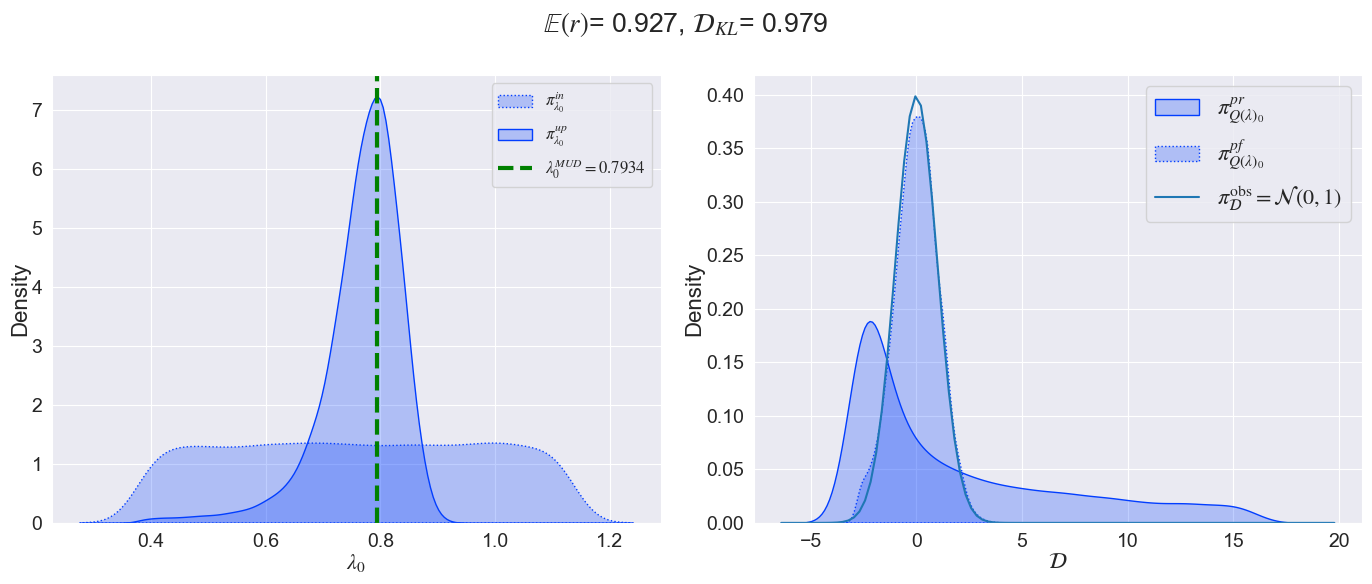

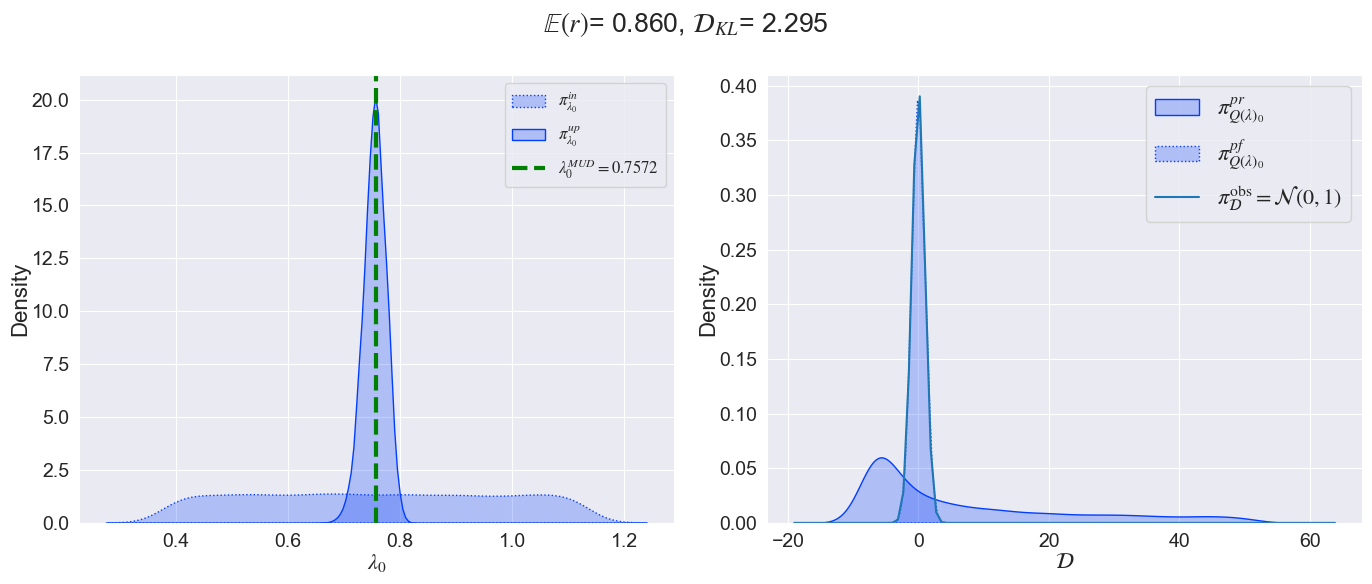

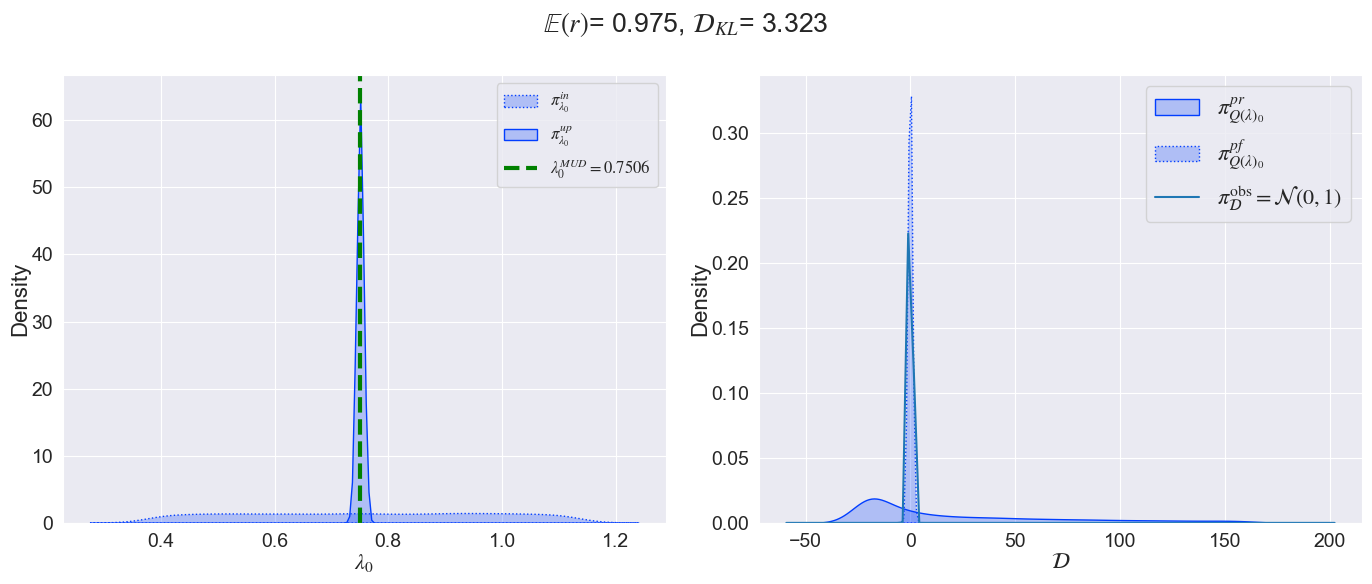

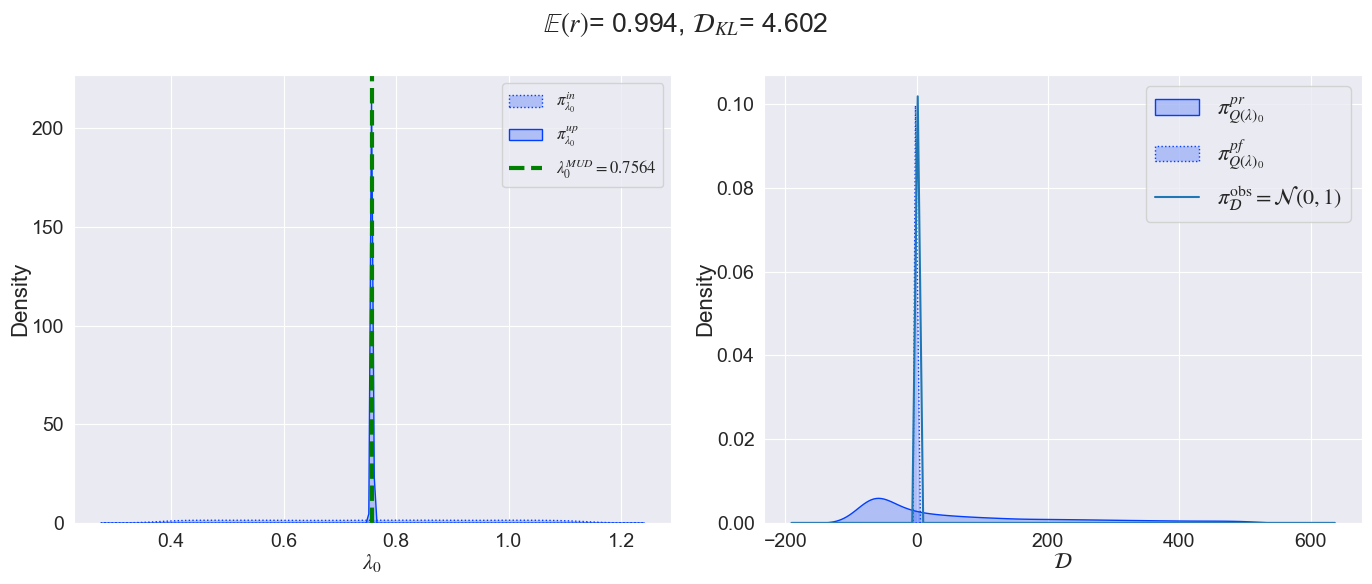

In [83]:
std_dev = 0.1
num_data = 10000

for n in [1, 10, 100, 1000]:
    enable_log(level="INFO")

    # * Initialize Problem
    mm1 = mon.Monomial1D(
            5,
            x0=[0],  # Note in the constant monomial case, initial state won't matter
            lam_true=[0.25**0.2],  # True observed value should be at 0.25
            solve_ts=1.0,
            sample_ts=1.0,
            measurement_noise=std_dev,
    )

    # * Pull synthetic data
    mm1.get_data(t0=0.0, tf=n)

    # * Forward solve samples from an initial
    pi_in, samples = mm1.get_uniform_initial_samples(num_samples=num_data, scale=0.5)
    mm1.forward_solve(samples=samples)

    # * Plot true, observe, and predicted states
    d_prob = PCAMUDProblem(
        mm1.samples[0],
        mm1.data[0],
        std_dev=std_dev)
    d_prob.solve()
    _ = d_prob.density_plots()

## 2D monomial

[10/30/23 23:53:01] INFO     Logger initialized                                                           ]8;id=705021;file:///Volumes/DataDrive/repos/pyDCI/src/pydci/log.py\log.py]8;;\:]8;id=985752;file:///Volumes/DataDrive/repos/pyDCI/src/pydci/log.py#87\87]8;;\

                    INFO     Getting data for model from 0.0 to 3.0                                    ]8;id=766303;file:///Volumes/DataDrive/repos/pyDCI/src/pydci/Model.py\Model.py]8;;\:]8;id=985185;file:///Volumes/DataDrive/repos/pyDCI/src/pydci/Model.py#389\389]8;;\

                    INFO     Drawing 2 from uniform at:                                                ]8;id=175364;file:///Volumes/DataDrive/repos/pyDCI/src/pydci/Model.py\Model.py]8;;\:]8;id=43759;file:///Volumes/DataDrive/repos/pyDCI/src/pydci/Model.py#584\584]8;;\
                                     loc: [0.15 0.4 ]                                                              
                                     scale: [0.3 0.8]                                                              

                    INFO     Beginning forward solve from 0.0 to 3.0                                   ]8;id=268745;file:///Volumes/DataDrive/repos/pyDCI/src/pydci/Model.py\Model.py]8;;\:]8;id=704388;file:///Volumes/DataDrive/repos/pyDCI/src/pydci/Model.py#457\457]8;;\

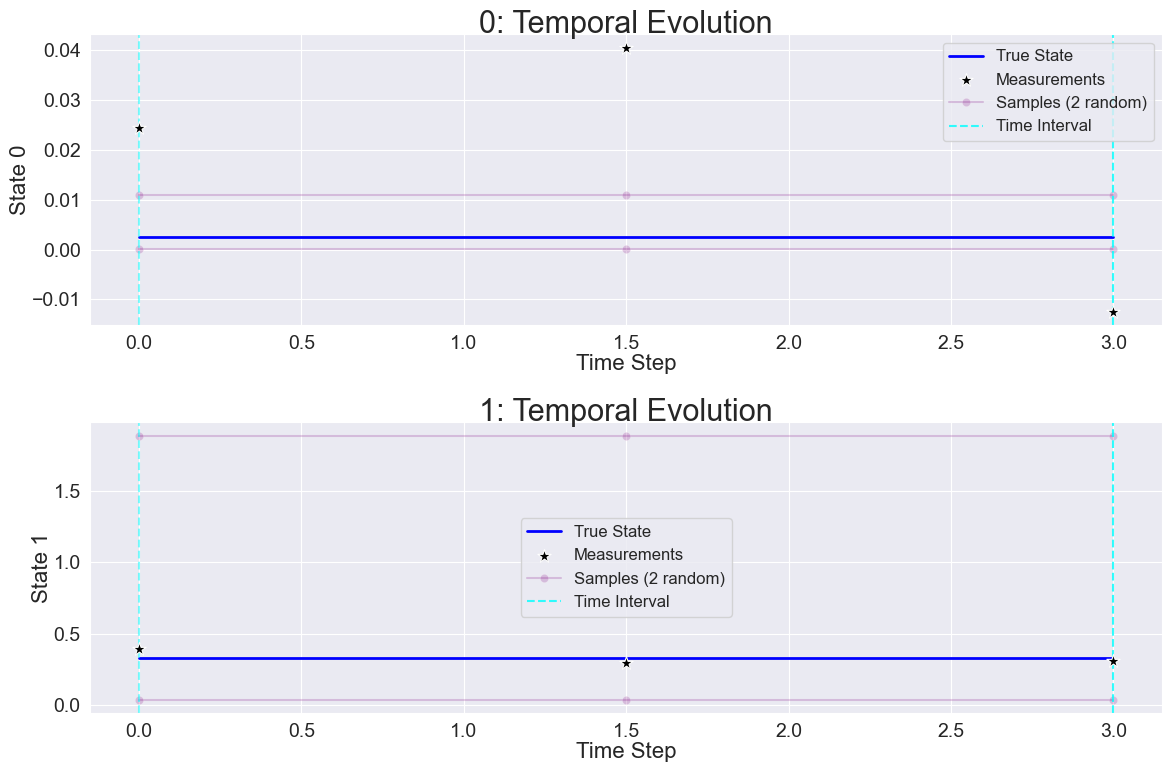

In [84]:
import pandas as pd, numpy as np
from pydci.log import enable_log, disable_log
import pydci.examples.monomial as mon
import importlib

importlib.reload(mon)


enable_log(level="INFO")

# * Initialize Problem
mm2 = mon.Monomial2D(p=5)

# * Pull synthetic data
mm2.get_data(t0=0.0, tf=3.0)

# * Forward solve samples from an initial
pi_in, samples = mm2.get_uniform_initial_samples(num_samples=2, scale=0.5)
mm2.forward_solve(samples=samples)

# * Plot true, observe, and predicted states
mm2.plot_states()

In [86]:
mm2.samples[0], mm2.samples_xf

(      lam_0     lam_1   q_lam_0   q_lam_1   q_lam_2   q_lam_3   q_lam_4  \
 0  0.178858  1.135833  0.000183  1.890485  0.000183  1.890485  0.000183   
 1  0.406132  0.516386  0.011049  0.036717  0.011049  0.036717  0.011049   
 
     q_lam_5  
 0  1.890485  
 1  0.036717  ,
 [array([[1.83036417e-04, 1.89048460e+00],
         [1.10493845e-02, 3.67173211e-02]])])

In [87]:
# Append samples
_, samples_1 = mm2.get_uniform_initial_samples(num_samples=2, scale=0.5)
mm2.forward_solve(samples=samples_1, append=True)

[10/30/23 23:53:08] INFO     Drawing 2 from uniform at:                                                ]8;id=290875;file:///Volumes/DataDrive/repos/pyDCI/src/pydci/Model.py\Model.py]8;;\:]8;id=89778;file:///Volumes/DataDrive/repos/pyDCI/src/pydci/Model.py#584\584]8;;\
                                     loc: [0.15 0.4 ]                                                              
                                     scale: [0.3 0.8]                                                              

                    INFO     Beginning forward solve from 0.0 to 3.0                                   ]8;id=917614;file:///Volumes/DataDrive/repos/pyDCI/src/pydci/Model.py\Model.py]8;;\:]8;id=980650;file:///Volumes/DataDrive/repos/pyDCI/src/pydci/Model.py#457\457]8;;\

In [88]:
mm2.samples[0], mm2.samples_xf

(      lam_0     lam_1   q_lam_0   q_lam_1   q_lam_2   q_lam_3   q_lam_4  \
 0  0.178858  1.135833  0.000183  1.890485  0.000183  1.890485  0.000183   
 1  0.406132  0.516386  0.011049  0.036717  0.011049  0.036717  0.011049   
 2  0.281780  0.556263  0.001776  0.053260  0.001776  0.053260  0.001776   
 3  0.230721  0.733002  0.000654  0.211605  0.000654  0.211605  0.000654   
 
     q_lam_5  
 0  1.890485  
 1  0.036717  
 2  0.053260  
 3  0.211605  ,
 [array([[1.83036417e-04, 1.89048460e+00],
         [1.10493845e-02, 3.67173211e-02],
         [1.77645594e-03, 5.32598202e-02],
         [6.53790006e-04, 2.11605213e-01]])])

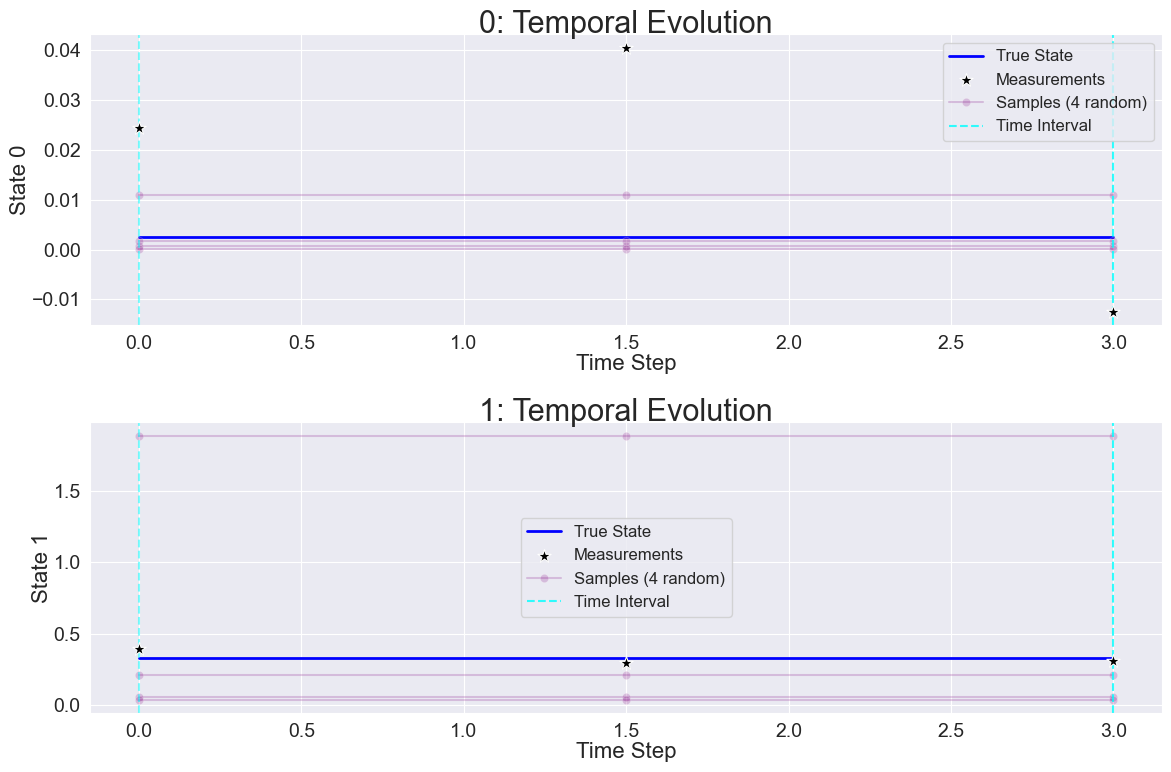

In [89]:
mm2.plot_states()

In [90]:
mm2.samples[0]

,lam_0,lam_1,q_lam_0,q_lam_1,q_lam_2,q_lam_3,q_lam_4,q_lam_5
0,0.178858,1.135833,0.000183,1.890485,0.000183,1.890485,0.000183,1.890485
1,0.406132,0.516386,0.011049,0.036717,0.011049,0.036717,0.011049,0.036717
2,0.281780,0.556263,0.001776,0.053260,0.001776,0.053260,0.001776,0.053260
3,0.230721,0.733002,0.000654,0.211605,0.000654,0.211605,0.000654,0.211605


[10/30/23 23:53:12] INFO     Getting data for model from 3.0 to 6                                      ]8;id=929302;file:///Volumes/DataDrive/repos/pyDCI/src/pydci/Model.py\Model.py]8;;\:]8;id=426604;file:///Volumes/DataDrive/repos/pyDCI/src/pydci/Model.py#389\389]8;;\

                    INFO     Beginning forward solve from 3.0 to 6.0                                   ]8;id=199153;file:///Volumes/DataDrive/repos/pyDCI/src/pydci/Model.py\Model.py]8;;\:]8;id=543581;file:///Volumes/DataDrive/repos/pyDCI/src/pydci/Model.py#457\457]8;;\

                    INFO     No samples passed. Resuming previous 4 samples                            ]8;id=733973;file:///Volumes/DataDrive/repos/pyDCI/src/pydci/Model.py\Model.py]8;;\:]8;id=367333;file:///Volumes/DataDrive/repos/pyDCI/src/pydci/Model.py#463\463]8;;\

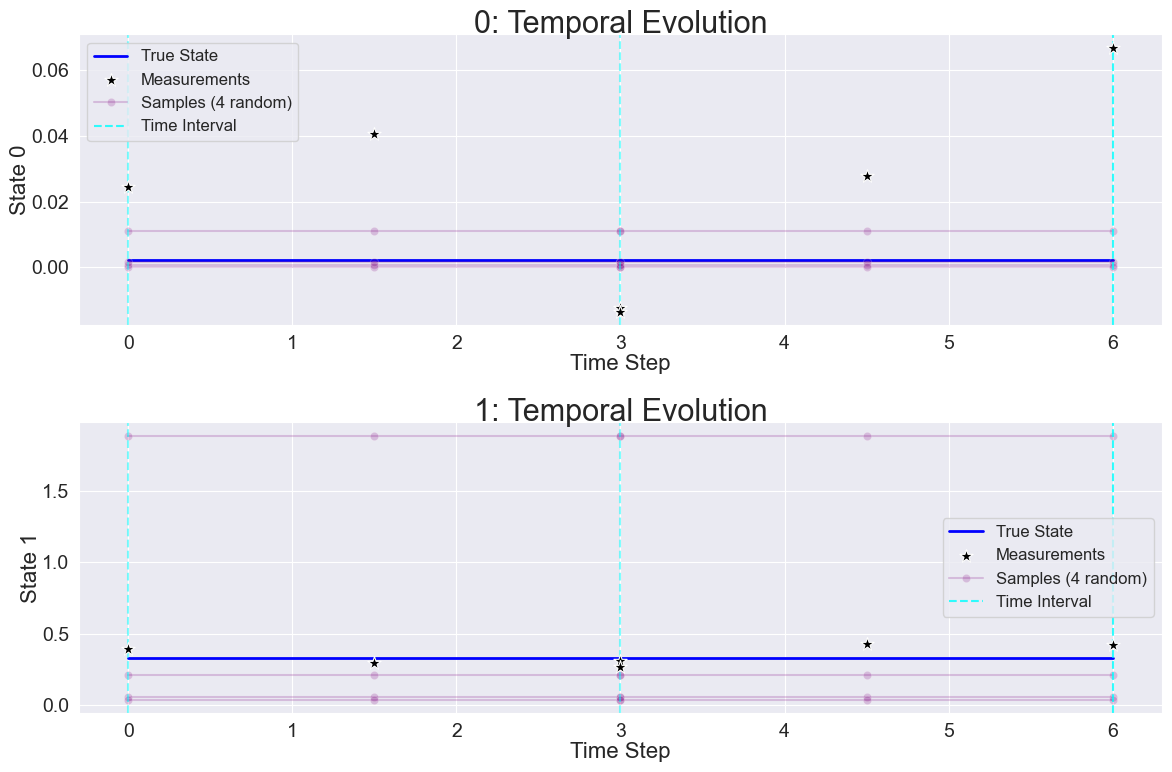

In [91]:
mm2.get_data(tf=6)
mm2.forward_solve()
# TODO: Fix plot-states: The lines should be the same throughout iterations since no new samples and constant model
mm2.plot_states()

In [92]:
mm2.samples[1], mm2.samples[0]

(      lam_0     lam_1   q_lam_0   q_lam_1   q_lam_2   q_lam_3   q_lam_4  \
 0  0.178858  1.135833  0.000183  1.890485  0.000183  1.890485  0.000183   
 1  0.406132  0.516386  0.011049  0.036717  0.011049  0.036717  0.011049   
 2  0.281780  0.556263  0.001776  0.053260  0.001776  0.053260  0.001776   
 3  0.230721  0.733002  0.000654  0.211605  0.000654  0.211605  0.000654   
 
     q_lam_5  
 0  1.890485  
 1  0.036717  
 2  0.053260  
 3  0.211605  ,
       lam_0     lam_1   q_lam_0   q_lam_1   q_lam_2   q_lam_3   q_lam_4  \
 0  0.178858  1.135833  0.000183  1.890485  0.000183  1.890485  0.000183   
 1  0.406132  0.516386  0.011049  0.036717  0.011049  0.036717  0.011049   
 2  0.281780  0.556263  0.001776  0.053260  0.001776  0.053260  0.001776   
 3  0.230721  0.733002  0.000654  0.211605  0.000654  0.211605  0.000654   
 
     q_lam_5  
 0  1.890485  
 1  0.036717  
 2  0.053260  
 3  0.211605  )

## Saving and Loading State

In [12]:
enable_log(level="DEBUG")
mm2.save("test.h5", overwrite=True)

[10/30/23 16:13:28] INFO     Logger initialized                                                           ]8;id=638226;file:///Volumes/DataDrive/repos/pyDCI/src/pydci/log.py\log.py]8;;\:]8;id=22375;file:///Volumes/DataDrive/repos/pyDCI/src/pydci/log.py#87\87]8;;\

                    INFO     Saving model to state file at test.h5                                     ]8;id=416516;file:///Volumes/DataDrive/repos/pyDCI/src/pydci/Model.py\Model.py]8;;\:]8;id=448515;file:///Volumes/DataDrive/repos/pyDCI/src/pydci/Model.py#250\250]8;;\

[10/30/23 16:13:31] DEBUG    Saving data as DataFrame                                                  ]8;id=64826;file:///Volumes/DataDrive/repos/pyDCI/src/pydci/Model.py\Model.py]8;;\:]8;id=429949;file:///Volumes/DataDrive/repos/pyDCI/src/pydci/Model.py#261\261]8;;\

                    DEBUG    Saving samples as DataFrame                                               ]8;id=50752;file:///Volumes/DataDrive/repos/pyDCI/src/pydci/Model.py\Model.py]8;;\:]8;id=494017;file:///Volumes/DataDrive/repos/pyDCI/src/pydci/Model.py#261\261]8;;\

                    DEBUG    Saving samples_xf as DataFrame                                            ]8;id=978641;file:///Volumes/DataDrive/repos/pyDCI/src/pydci/Model.py\Model.py]8;;\:]8;id=984668;file:///Volumes/DataDrive/repos/pyDCI/src/pydci/Model.py#261\261]8;;\

/Volumes/DataDrive/repos/pyDCI/src/pydci/Model.py:271: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed-integer,key->values] [items->None]

  store.put("__attrs__", pd.Series(info_dict))


[10/30/23 16:13:48] INFO     Logger initialized                                                           ]8;id=52837;file:///Volumes/DataDrive/repos/pyDCI/src/pydci/log.py\log.py]8;;\:]8;id=98316;file:///Volumes/DataDrive/repos/pyDCI/src/pydci/log.py#87\87]8;;\

                    INFO     Loading model state from state file at                                    ]8;id=635950;file:///Volumes/DataDrive/repos/pyDCI/src/pydci/Model.py\Model.py]8;;\:]8;id=185286;file:///Volumes/DataDrive/repos/pyDCI/src/pydci/Model.py#197\197]8;;\
                             /Volumes/DataDrive/repos/pyDCI/notebooks/Examples/test.h5                             

                    DEBUG    type(/__attrs__) = <class 'tables.group.Group'>                           ]8;id=746108;file:///Volumes/DataDrive/repos/pyDCI/src/pydci/Model.py\Model.py]8;;\:]8;id=508111;file:///Volumes/DataDrive/repos/pyDCI/src/pydci/Model.py#201\201]8;;\
                              ?= DataframeDF -> False                                                              
                              ? = Series -> True                                                                   
                              ? = dict -> False                                                                    

                    DEBUG    type(/data) = <class 'tables.group.Group'>                                ]8;id=403961;file:///Volumes/DataDrive/repos/pyDCI/src/pydci/Model.py\Model.py]8;;\:]8;id=936288;file:///Volumes/DataDrive/repos/pyDCI/src/pydci/Model.py#201\201]8;;\
                              ?= DataframeDF -> True                                                               
                              ? = Series -> False                                                                  
                              ? = dict -> False                                                                    

                    DEBUG    DF: /data:[    ts  shift_idx  sample_flag  lam_true_0  q_lam_true_0       ]8;id=809287;file:///Volumes/DataDrive/repos/pyDCI/src/pydci/Model.py\Model.py]8;;\:]8;id=718980;file:///Volumes/DataDrive/repos/pyDCI/src/pydci/Model.py#212\212]8;;\
                             q_lam_true_1  \                                                                       
                             0  0.0          0         True         0.3       0.00243       0.32768                
                                                                                                                   
                                q_lam_obs_0  q_lam_obs_1                                                           
                             0     0.116672       0.3355  ,     ts  shift_idx  sample_flag  lam_true_0             
                             q_lam_true_0  q_lam_true_1  \                                                         
                             0  3.0          0         True         0.3       0.00243       0.32768                
                                                                                                                   
                                q_lam_obs_0  q_lam_obs_1                                                           
                             0    -0.069718     0.312723  ]                                                        

                    DEBUG    type(/samples) = <class 'tables.group.Group'>                             ]8;id=172508;file:///Volumes/DataDrive/repos/pyDCI/src/pydci/Model.py\Model.py]8;;\:]8;id=220735;file:///Volumes/DataDrive/repos/pyDCI/src/pydci/Model.py#201\201]8;;\
                              ?= DataframeDF -> True                                                               
                              ? = Series -> False                                                                  
                              ? = dict -> False                                                                    

                    DEBUG    DF: /samples:[      lam_0     lam_1   q_lam_0   q_lam_1   q_lam_2         ]8;id=607405;file:///Volumes/DataDrive/repos/pyDCI/src/pydci/Model.py\Model.py]8;;\:]8;id=708771;file:///Volumes/DataDrive/repos/pyDCI/src/pydci/Model.py#212\212]8;;\
                             q_lam_3   q_lam_4  \                                                                  
                             0  0.404017  0.489201  0.010765  0.028018  0.010765  0.028018  0.010765               
                                                                                                                   
                                 q_lam_5                                                                           
                             0  0.028018  ,       lam_0     lam_1   q_lam_0   q_lam_1   q_lam_2                    
                             q_lam_3   q_lam_4  \                                                                  
                             0  0.404017  0.489201  0.010765  0.028018  0.010765  0.028018  0.010765               
                                                                                                                   
                                 q_lam_5                                                                           
                             0  0.028018  ]                                                                        

                    DEBUG    type(/samples_xf) = <class 'tables.group.Group'>                          ]8;id=574068;file:///Volumes/DataDrive/repos/pyDCI/src/pydci/Model.py\Model.py]8;;\:]8;id=852075;file:///Volumes/DataDrive/repos/pyDCI/src/pydci/Model.py#201\201]8;;\
                              ?= DataframeDF -> True                                                               
                              ? = Series -> False                                                                  
                              ? = dict -> False                                                                    

                    DEBUG    DF: /samples_xf:[          0         1                                    ]8;id=782812;file:///Volumes/DataDrive/repos/pyDCI/src/pydci/Model.py\Model.py]8;;\:]8;id=871672;file:///Volumes/DataDrive/repos/pyDCI/src/pydci/Model.py#212\212]8;;\
                             0  0.010765  0.028018,           0         1                                          
                             0  0.010765  0.028018]                                                                

                    DEBUG    Setting info attributes of 8                                              ]8;id=134032;file:///Volumes/DataDrive/repos/pyDCI/src/pydci/Model.py\Model.py]8;;\:]8;id=28353;file:///Volumes/DataDrive/repos/pyDCI/src/pydci/Model.py#221\221]8;;\

                    DEBUG    Setting attr def_init to ['uniform', {'scale': 1.0}]                      ]8;id=867407;file:///Volumes/DataDrive/repos/pyDCI/src/pydci/Model.py\Model.py]8;;\:]8;id=782515;file:///Volumes/DataDrive/repos/pyDCI/src/pydci/Model.py#223\223]8;;\

                    DEBUG    Setting attr lam_true to [0.3 0.8]                                        ]8;id=780771;file:///Volumes/DataDrive/repos/pyDCI/src/pydci/Model.py\Model.py]8;;\:]8;id=586528;file:///Volumes/DataDrive/repos/pyDCI/src/pydci/Model.py#223\223]8;;\

                    DEBUG    Setting attr measurement_noise to 0.05                                    ]8;id=191383;file:///Volumes/DataDrive/repos/pyDCI/src/pydci/Model.py\Model.py]8;;\:]8;id=300631;file:///Volumes/DataDrive/repos/pyDCI/src/pydci/Model.py#223\223]8;;\

                    DEBUG    Setting attr p to 5                                                       ]8;id=588490;file:///Volumes/DataDrive/repos/pyDCI/src/pydci/Model.py\Model.py]8;;\:]8;id=645830;file:///Volumes/DataDrive/repos/pyDCI/src/pydci/Model.py#223\223]8;;\

                    DEBUG    Setting attr sample_ts to 1.0                                             ]8;id=122654;file:///Volumes/DataDrive/repos/pyDCI/src/pydci/Model.py\Model.py]8;;\:]8;id=238317;file:///Volumes/DataDrive/repos/pyDCI/src/pydci/Model.py#223\223]8;;\

                    DEBUG    Setting attr solve_ts to 1.0                                              ]8;id=619949;file:///Volumes/DataDrive/repos/pyDCI/src/pydci/Model.py\Model.py]8;;\:]8;id=495135;file:///Volumes/DataDrive/repos/pyDCI/src/pydci/Model.py#223\223]8;;\

                    DEBUG    Setting attr state_idxs to [0 1]                                          ]8;id=983723;file:///Volumes/DataDrive/repos/pyDCI/src/pydci/Model.py\Model.py]8;;\:]8;id=943247;file:///Volumes/DataDrive/repos/pyDCI/src/pydci/Model.py#223\223]8;;\

                    DEBUG    Setting attr x0 to [0, 0]                                                 ]8;id=717334;file:///Volumes/DataDrive/repos/pyDCI/src/pydci/Model.py\Model.py]8;;\:]8;id=543412;file:///Volumes/DataDrive/repos/pyDCI/src/pydci/Model.py#223\223]8;;\

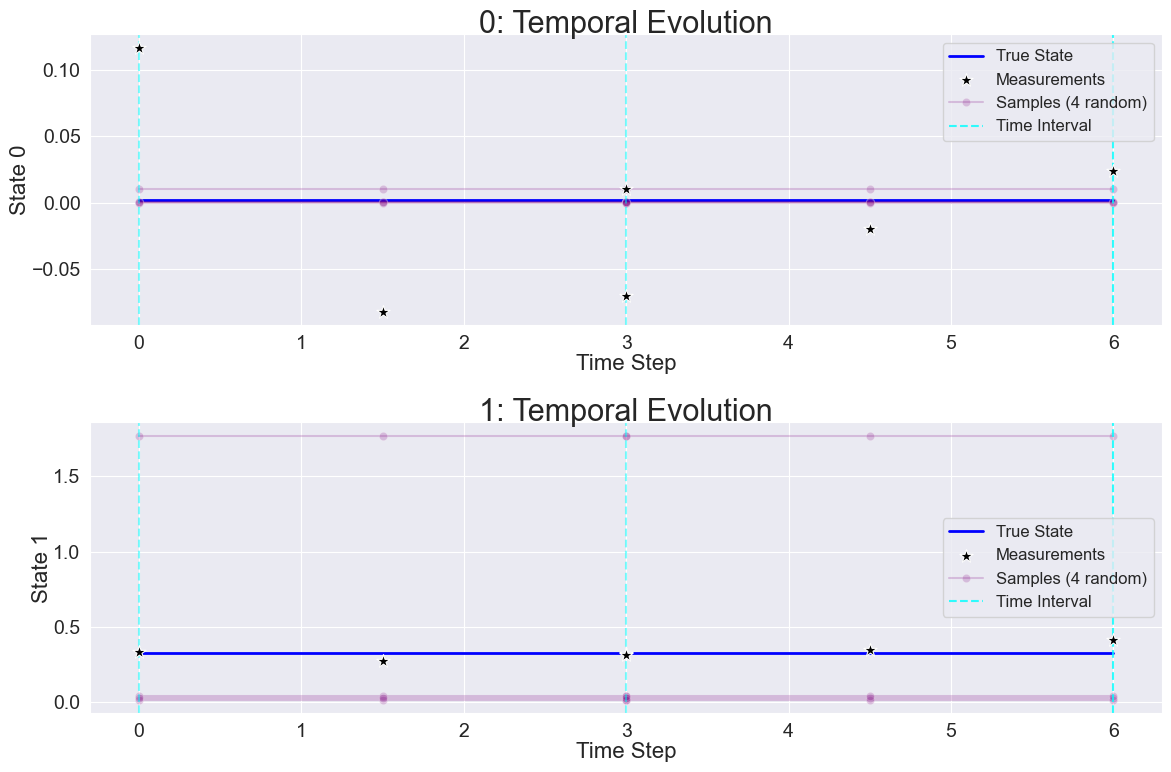

In [13]:
enable_log(level="DEBUG")
mm2_load = mon.Monomial2D(file="test.h5")

mm2_load.plot_states()

In [14]:
mm2_load.samples

[      lam_0     lam_1   q_lam_0   q_lam_1   q_lam_2   q_lam_3   q_lam_4  \
 0  0.404017  0.489201  0.010765  0.028018  0.010765  0.028018  0.010765   
 1  0.190901  0.533600  0.000254  0.043259  0.000254  0.043259  0.000254   
 2  0.230297  0.449416  0.000648  0.018333  0.000648  0.018333  0.000648   
 3  0.219181  1.120784  0.000506  1.768516  0.000506  1.768516  0.000506   
 
     q_lam_5  
 0  0.028018  
 1  0.043259  
 2  0.018333  
 3  1.768516  ,
       lam_0     lam_1   q_lam_0   q_lam_1   q_lam_2   q_lam_3   q_lam_4  \
 0  0.404017  0.489201  0.010765  0.028018  0.010765  0.028018  0.010765   
 1  0.190901  0.533600  0.000254  0.043259  0.000254  0.043259  0.000254   
 2  0.230297  0.449416  0.000648  0.018333  0.000648  0.018333  0.000648   
 3  0.219181  1.120784  0.000506  1.768516  0.000506  1.768516  0.000506   
 
     q_lam_5  
 0  0.028018  
 1  0.043259  
 2  0.018333  
 3  1.768516  ]

In [15]:
mm2_load.get_samples(data_idx=-1)

array([[0.40401699, 0.48920058],
       [0.19090094, 0.53359995],
       [0.23029718, 0.44941598],
       [0.21918103, 1.12078363]])

[10/30/23 16:13:58] INFO     Getting data for model from 6.0 to 24                                     ]8;id=534600;file:///Volumes/DataDrive/repos/pyDCI/src/pydci/Model.py\Model.py]8;;\:]8;id=398709;file:///Volumes/DataDrive/repos/pyDCI/src/pydci/Model.py#389\389]8;;\

                    DEBUG    Shapes: (18, 2), (18, 2), (18,)                                           ]8;id=522177;file:///Volumes/DataDrive/repos/pyDCI/src/pydci/Model.py\Model.py]8;;\:]8;id=900663;file:///Volumes/DataDrive/repos/pyDCI/src/pydci/Model.py#404\404]8;;\

                    INFO     Beginning forward solve from 6.0 to 24.0                                  ]8;id=369909;file:///Volumes/DataDrive/repos/pyDCI/src/pydci/Model.py\Model.py]8;;\:]8;id=311688;file:///Volumes/DataDrive/repos/pyDCI/src/pydci/Model.py#457\457]8;;\

                    INFO     No samples passed. Resuming previous 4 samples                            ]8;id=578976;file:///Volumes/DataDrive/repos/pyDCI/src/pydci/Model.py\Model.py]8;;\:]8;id=842224;file:///Volumes/DataDrive/repos/pyDCI/src/pydci/Model.py#463\463]8;;\

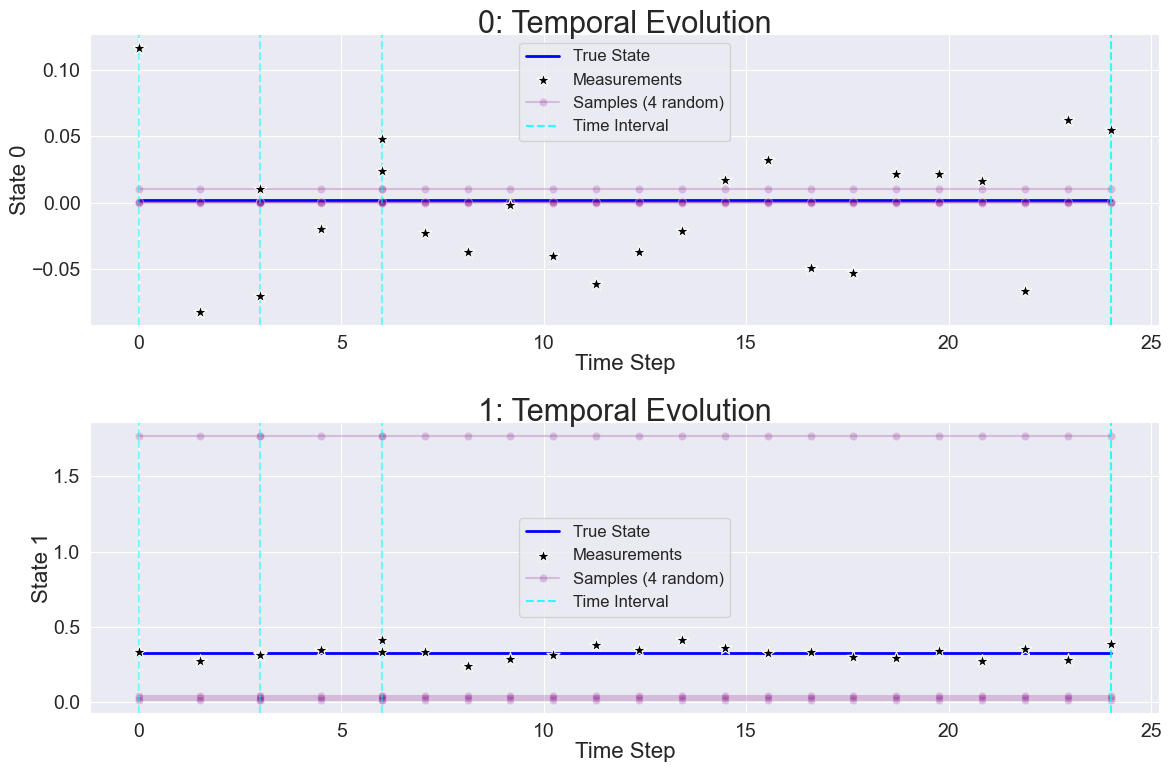

In [16]:
mm2_load.get_data(tf=24)
mm2_load.forward_solve()
mm2_load.plot_states()

# MUD Estimate

TODO: Test for MUD Estimates

In [17]:
import matplotlib.pyplot as plt
import pydci.consistent_bayes.PCAMUDProblem as pcp
import importlib

importlib.reload(pcp)

# NOTE: do not pass in Model classes data dataframe -> This contains all timesteps of the true signal
prob = pcp.PCAMUDProblem(
    res2["samples"], res2["data"], mm2.measurement_noise, pi_in=pi_in
)
prob.state

╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ in <module>:9                                                                                    │
│                                                                                                  │
│    6                                                                                             │
│    7 # NOTE: do not pass in Model classes data dataframe -> This contains all timesteps of th    │
│    8 prob = pcp.PCAMUDProblem(                                                                   │
│ ❱  9 │   res2["samples"], res2["data"], mm2.measurement_noise, pi_in=pi_in                       │
│   10 )                                                                                           │
│   11 prob.state                                                                                  │
│   12                                                                                             │
│                                                                                                  │
│ ╭─────────────────────────────────────────── locals ───────────────────────────────────────────╮ │
│ │ disable_log = <function disable_log at 0x15a5de200>                                          │ │
│ │  enable_log = <function enable_log at 0x15a5de160>                                           │ │
│ │        exit = <IPython.core.autocall.ZMQExitAutocall object at 0x110723860>                  │ │
│ │ get_ipython = <bound method InteractiveShell.get_ipython of                                  │ │
│ │               <ipykernel.zmqshell.ZMQInteractiveShell object at 0x1107230b0>>                │ │
│ │   importlib = <module 'importlib' from                                                       │ │
│ │               '/Users/carlos/.mm/envs/pyDCI/lib/python3.12/importlib/__init__.py'>           │ │
│ │          In = [                                                                              │ │
│ │               │   '',                                                                        │ │
│ │               │   'import pandas as pd, numpy as np\nfrom pydci.log import enable_log,       │ │
│ │               disable_log\ni'+424,                                                           │ │
│ │               │   'mm2.samples[0], mm2.samples_xf',                                          │ │
│ │               │   'mm2.samples[0], mm2.samples_xf',                                          │ │
│ │               │   '# Append samples\n_, samples_1 =                                          │ │
│ │               mm2.get_uniform_initial_samples(num_samples=2, s'+59,                          │ │
│ │               │   'mm2.samples[0], mm2.samples_xf',                                          │ │
│ │               │   'mm2.plot_states()',                                                       │ │
│ │               │   'mm2.samples[0]',                                                          │ │
│ │               │   'mm2.get_data(tf=6)\nmm2.forward_solve()\n# TODO: Fix plot-states: The     │ │
│ │               lines should'+92,                                                              │ │
│ │               │   'mm2.samples[1], mm2.samples[0]',                                          │ │
│ │               │   ... +8                                                                     │ │
│ │               ]                                                                              │ │
│ │         mm2 = <pydci.examples.monomial.Monomial2D object at 0x15a5a6630>                     │ │
│ │    mm2_load = <pydci.examples.monomial.Monomial2D object at 0x104d1a420>                     │ │
│ │         mon = <module 'pydci.examples.monomial' from                                         │ │
│ │               '/Volumes/DataDrive/repos/pyDCI/src/pydci/examples/monomial.py'>               │ │
│ │          np = <module 'numpy' from                       

## Both Principal Components

(<Axes: xlabel='$\\Lambda$', ylabel='Density'>,
 ['$\\pi^{up}_{\\lambda_1}$',
  '$\\pi^{in}_{\\lambda_1}$',
  '$\\lambda^{\\dagger}_1 = 0.8000$',
  '$\\lambda^{MUD}_1 = 0.7593$'])

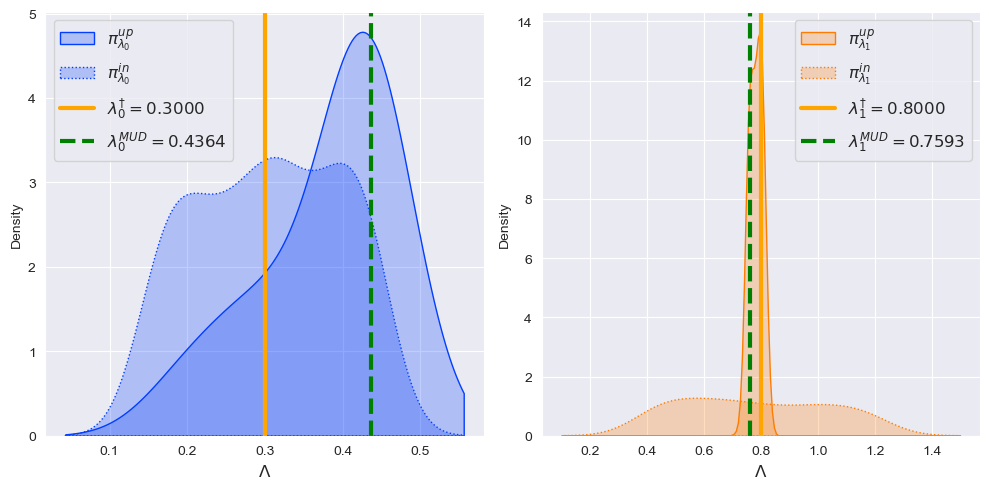

In [ ]:
prob.solve(pca_components=[0, 1])

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
prob.plot_L(df=prob.state, param_idx=0, ax=ax[0], lam_true=[mm2.lam_true])
prob.plot_L(df=prob.state, param_idx=1, ax=ax[1], lam_true=[mm2.lam_true])

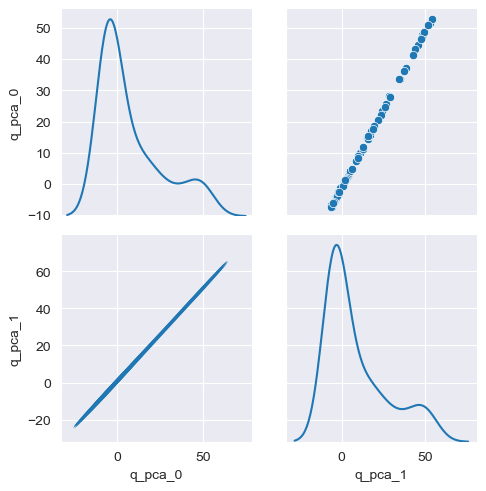

In [ ]:
prob.learned_qoi_plot()

## First Principal Component Only

(<Axes: xlabel='$\\Lambda$', ylabel='Density'>,
 ['$\\pi^{up}_{\\lambda_1}$',
  '$\\pi^{in}_{\\lambda_1}$',
  '$\\lambda^{\\dagger}_1 = 0.8000$',
  '$\\lambda^{MUD}_1 = 0.7912$'])

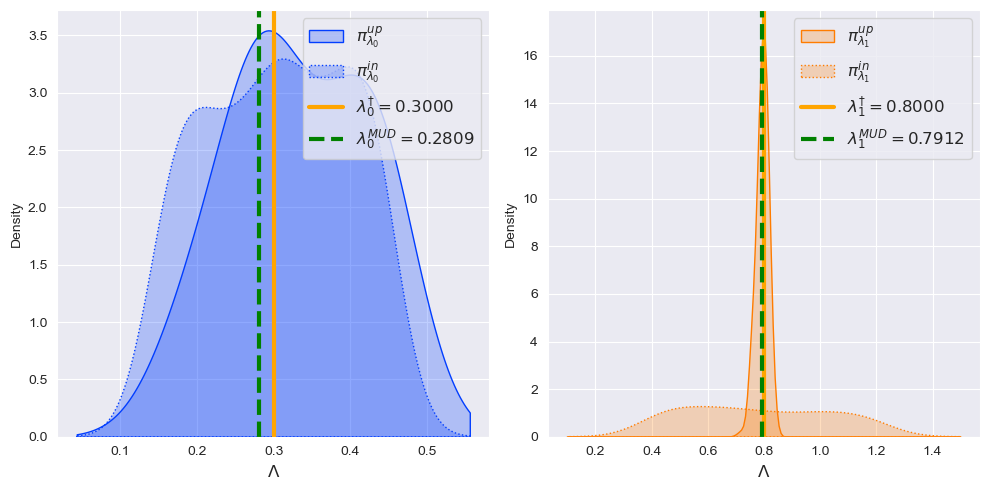

In [ ]:
prob.solve(pca_components=[0])

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
prob.plot_L(df=prob.state, param_idx=0, ax=ax[0], lam_true=[mm2.lam_true])
prob.plot_L(df=prob.state, param_idx=1, ax=ax[1], lam_true=[mm2.lam_true])

## Second Principal Component Only

(<Axes: xlabel='$\\Lambda$', ylabel='Density'>,
 ['$\\pi^{up}_{\\lambda_1}$',
  '$\\pi^{in}_{\\lambda_1}$',
  '$\\lambda^{\\dagger}_1 = 0.8000$',
  '$\\lambda^{MUD}_1 = 0.7791$'])

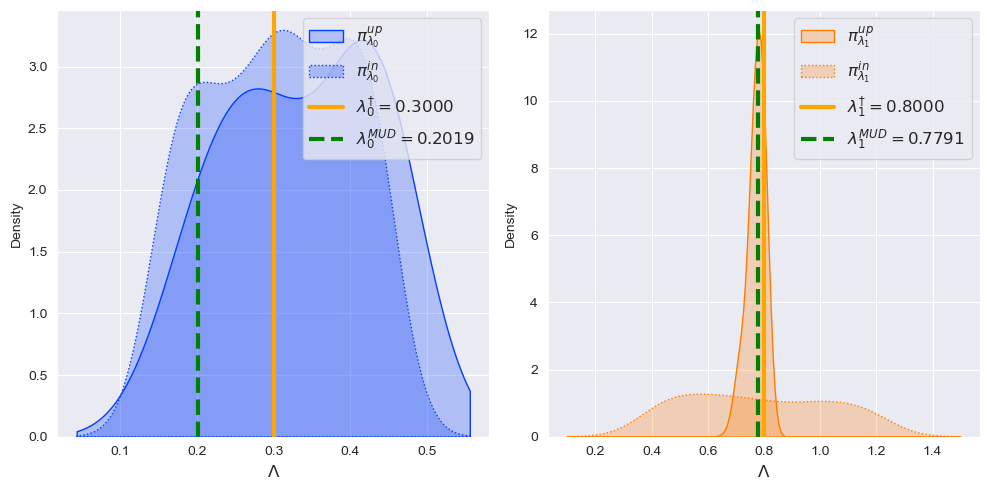

In [ ]:
prob.solve(pca_components=[1])

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
prob.plot_L(df=prob.state, param_idx=0, ax=ax[0], lam_true=[mm2.lam_true])
prob.plot_L(df=prob.state, param_idx=1, ax=ax[1], lam_true=[mm2.lam_true])

## First State Only

(<Axes: xlabel='$\\Lambda$', ylabel='Density'>,
 ['$\\pi^{up}_{\\lambda_1}$',
  '$\\pi^{in}_{\\lambda_1}$',
  '$\\lambda^{\\dagger}_1 = 0.8000$',
  '$\\lambda^{MUD}_1 = 1.0767$'])

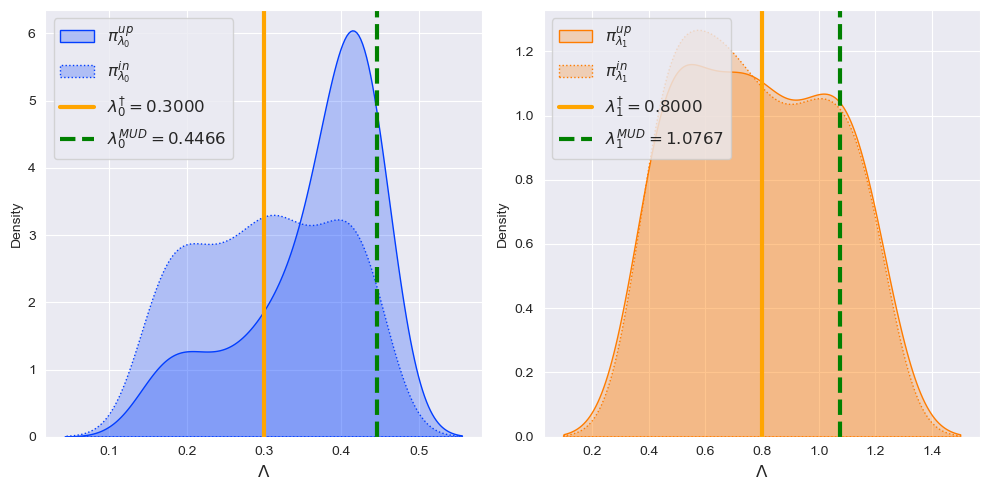

In [ ]:
prob = pcp.PCAMUDProblem(
    res2["samples"], res2["data"], mm2.measurement_noise, pi_in=pi_in
)
prob.solve(pca_mask=range(0, prob.n_qoi, 2), pca_components=[0])

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
prob.plot_L(df=prob.state, param_idx=0, ax=ax[0], lam_true=[mm2.lam_true])
prob.plot_L(df=prob.state, param_idx=1, ax=ax[1], lam_true=[mm2.lam_true])

## Second State Only

(<Axes: xlabel='$\\Lambda$', ylabel='Density'>,
 ['$\\pi^{up}_{\\lambda_1}$',
  '$\\pi^{in}_{\\lambda_1}$',
  '$\\lambda^{MUD}_1 = 0.7791$'])

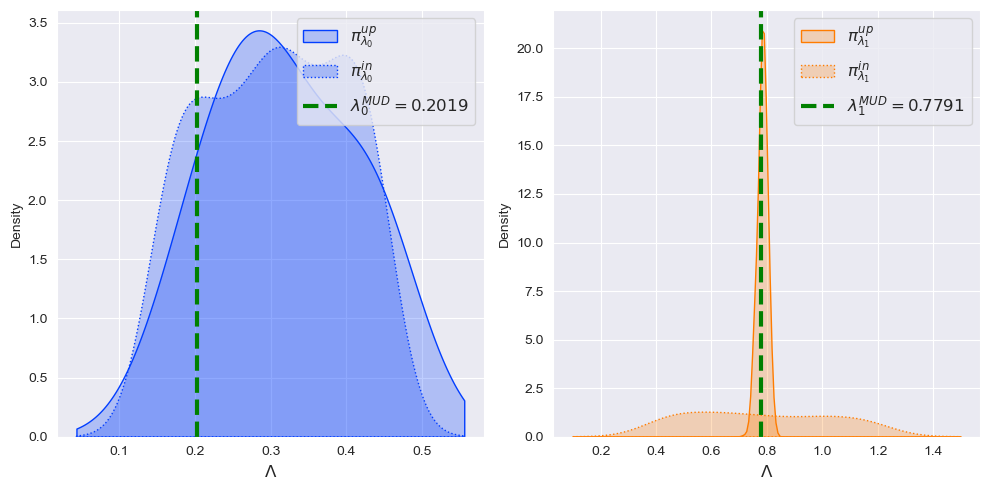

In [ ]:
prob = pcp.PCAMUDProblem(
    res2["samples"], res2["data"], mm2.measurement_noise, pi_in=pi_in
)
prob.solve(pca_mask=range(1, prob.n_qoi, 2), pca_components=[0])

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
prob.plot_L(df=prob.state, param_idx=0, ax=ax[0])
prob.plot_L(df=prob.state, param_idx=1, ax=ax[1])

## Iterating Over Components

(<Axes: xlabel='$\\Lambda$', ylabel='Density'>,
 ['$\\pi^{up}_{\\lambda_1}$',
  '$\\pi^{in}_{\\lambda_1}$',
  '$\\lambda^{\\dagger}_1 = 0.8000$',
  '$\\lambda^{MUD}_1 = 0.8016$'])

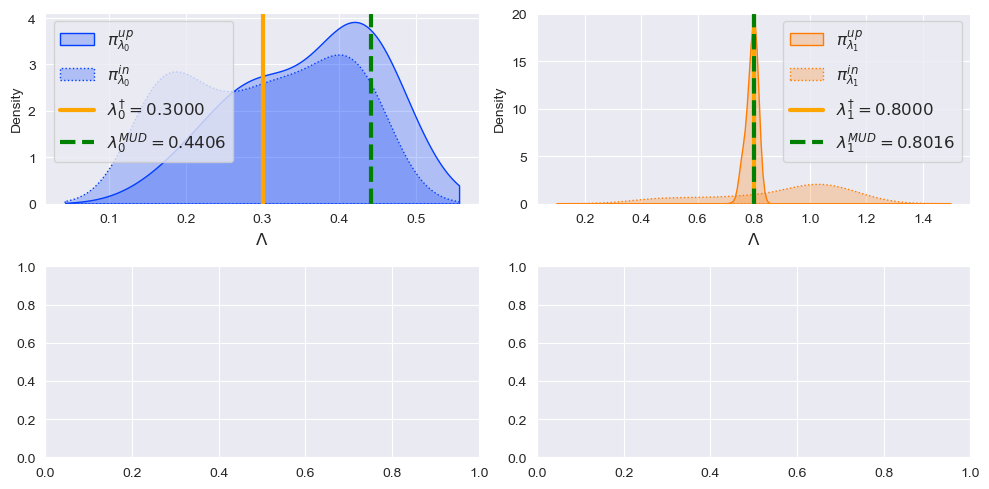

In [ ]:
prob = pcp.PCAMUDProblem(
    res2["samples"], res2["data"], mm2.measurement_noise, pi_in=pi_in
)
prob.solve_it(pca_components=[[0], [1]])

fig, ax = plt.subplots(2, 2, figsize=(10, 5))


prob.plot_L(df=prob.state, param_idx=0, ax=ax[0][0], lam_true=[mm2.lam_true])
prob.plot_L(df=prob.state, param_idx=1, ax=ax[0][1], lam_true=[mm2.lam_true])

### Sub-selecting by state

Lets iterate on a PCA map of data only aggregated from 

Text(0.5, 1.0, '$\\lambda_{1}$ update using only state 1')

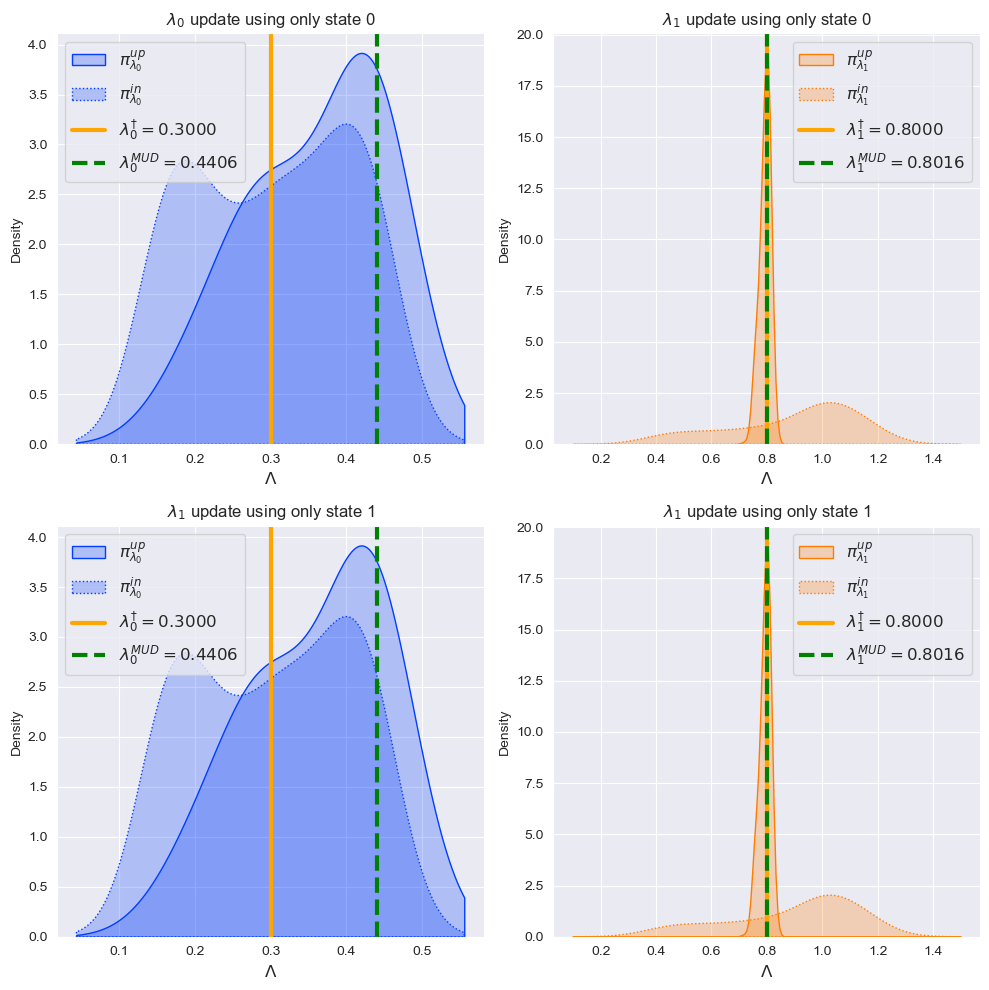

In [ ]:
fig, ax = plt.subplots(2, 2, figsize=(10, 10))

prob.solve(pca_mask=range(0, prob.n_qoi, 2), pca_components=[0])
prob.plot_L(df=prob.state, param_idx=0, ax=ax[0][0], lam_true=[mm2.lam_true])
ax[0][0].set_title("$\lambda_{0}$ update using only state 0")
prob.plot_L(df=prob.state, param_idx=1, ax=ax[0][1], lam_true=[mm2.lam_true])
ax[0][1].set_title("$\lambda_{1}$ update using only state 0")

prob.solve(pca_mask=range(1, prob.n_qoi, 2), pca_components=[0])
prob.plot_L(df=prob.state, param_idx=0, ax=ax[1][0], lam_true=[mm2.lam_true])
ax[1][0].set_title("$\lambda_{1}$ update using only state 1")
prob.plot_L(df=prob.state, param_idx=1, ax=ax[1][1], lam_true=[mm2.lam_true])
ax[1][1].set_title("$\lambda_{1}$ update using only state 1")

### Iterating over states

Text(0.5, 1.0, '$\\lambda_{1}$ update using only state 0')

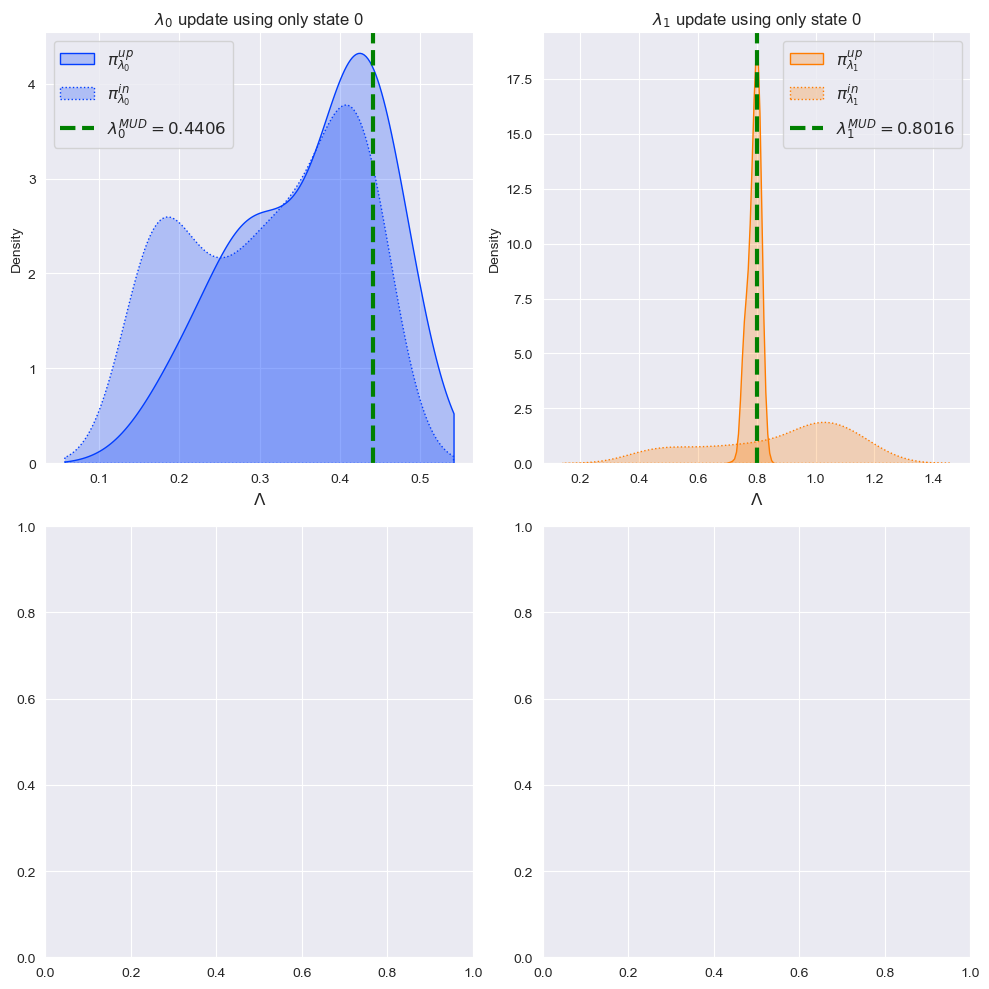

In [ ]:
fig, ax = plt.subplots(2, 2, figsize=(10, 10))

prob.solve_it(
    pca_splits=[range(0, prob.n_qoi, 2), range(1, prob.n_qoi, 2)],
    pca_components=[[0]],
    exp_thresh=1e30,
)
prob.plot_L(df=prob.state, param_idx=0, ax=ax[0][0])
ax[0][0].set_title("$\lambda_{0}$ update using only state 0")
prob.plot_L(df=prob.state, param_idx=1, ax=ax[0][1])
ax[0][1].set_title("$\lambda_{1}$ update using only state 0")

# Estimate Methods

In [ ]:
from pydci.examples.monomial import Monomial2D

mm2 = Monomial2D(5)
mm2.estimate_params([5, 10])
mm2.plot_states()

NotImplementedError: estimate_params() base class skeleton.

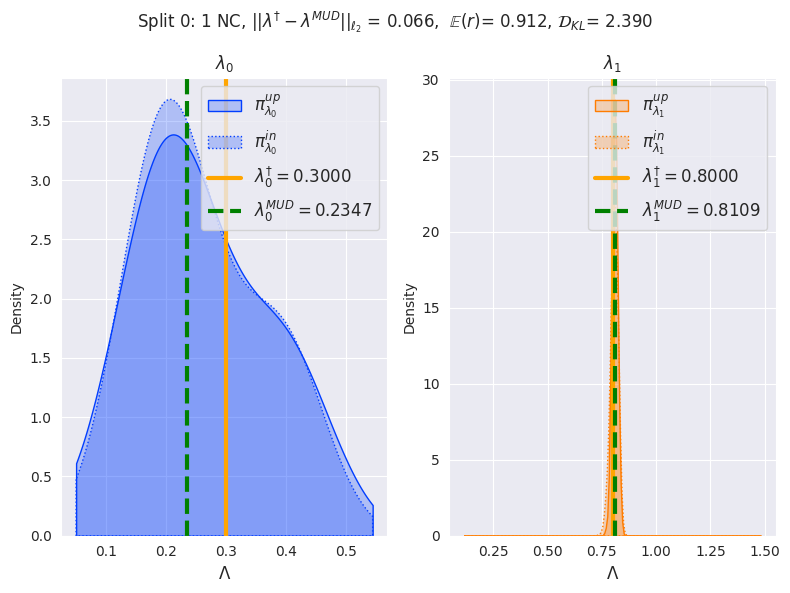

In [ ]:
mm2.probs[0].param_density_plots(lam_true=mm2.lam_true, base_size=6)

# Sequential Parameter Estimation - AKA Data Assimilation

Sequential (non-split) estimation where we can re-sample and assimilate observed data into our simulated samples between iterations.

TODO: Do this with new class that separates model and `SequentialProblem` class.

In [ ]:
from pydci.log import logger, enable_log
from pydci import SplitSequentialProblem

enable_log()

from pydci import Model
import importlib

importlib.reload(Model)
import pdb
import numpy as np
import matplotlib.pyplot as plt


class Monomial2D(Model.DynamicModel):
    def __init__(
        self,
        p,
        x0=[0, 0],  # Note in the constant monomial case, initial state won't matter
        lam_true=[0.3, 0.8],
        solve_ts=1.0,
        sample_ts=1.1,
        measurement_noise=0.05,
        **kwargs,
    ):
        self.p = p
        super().__init__(
            x0,
            lam_true,
            solve_ts=solve_ts,
            sample_ts=sample_ts,
            measurement_noise=measurement_noise,
            **kwargs,
        )

    def forward_model(
        self,
        x0,
        times,
        lam,
    ):
        """
        Monomial Forward Model

        Static in time (tim array ignored)
        """
        res = np.repeat(np.array([[lam[0] ** self.p, lam[1] ** self.p]]), 1, axis=1)
        return res

    def plot_states(
        self,
    ):
        fig, ax = plt.subplots(2, 1, figsize=(12, 8))
        for i, ax in enumerate(ax):
            self.plot_state(state_idx=i, ax=ax)
            ax.set_title(f"{i}: Temporal Evolution")


mm2 = Monomial2D(5)
lam = mm2.get_uniform_initial_samples(num_samples=100, scale=0.5)
args = mm2.forward_solve(5.0, samples=lam)


class SequentialProblem:
    def __init__(self, model):
        self.model = model
        self.probs = []

    def solve(self, time_windows, num_samples=100, diff=0.5, splits_per=1):
        pi_in = None
        samples = self.model.get_uniform_initial_samples(
            num_samples=num_samples, scale=diff
        )
        for t in time_windows:
            logger.info(f"Starting iteration from {self.model.t0} to {t}")
            args = self.model.forward_solve(t, samples=samples)
            logger.info(f"Solving inverse problem")
            prob = SplitSequentialProblem(
                args["samples"], args["data"], args["std_dev"], pi_in=pi_in
            )
            prob.solve(num_splits=splits_per)
            logger.info(f"Drawing samples from updated distribution")
            samples = prob.sample_dist(num_samples=num_samples)
            self.probs.append(prob)

[04/14/23 17:07:30] INFO     Logger initialized                                                           ]8;id=599938;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/log.py\log.py]8;;\:]8;id=777126;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/log.py#78\78]8;;\

                    INFO     Drawing 100 from uniform at:                                              ]8;id=775114;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/Model.py\Model.py]8;;\:]8;id=50215;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/Model.py#242\242]8;;\
                                     loc: [0.15 0.4 ]                                                              
                                     scale: [0.3 0.8]                                                              

Solving model sample set: |████████████████████| 100/100 [100%] in 0.0s (37564.7


In [ ]:
mm2 = Monomial2D(5)
time_windows = [5, 10, 15]
seq_prob = SequentialProblem(mm2)

seq_prob.solve(time_windows)

                    INFO     Drawing 100 from uniform at:                                              ]8;id=251698;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/Model.py\Model.py]8;;\:]8;id=924042;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/Model.py#242\242]8;;\
                                     loc: [0.15 0.4 ]                                                              
                                     scale: [0.3 0.8]                                                              

                    INFO     Starting iteration from 0.0 to 5                                      ]8;id=638334;file:///tmp/ipykernel_1785648/4009830505.py\4009830505.py]8;;\:]8;id=632493;file:///tmp/ipykernel_1785648/4009830505.py#76\76]8;;\

Solving model sample set: |████████████████████| 100/100 [100%] in 0.0s (34279.0


                    INFO     Solving inverse problem                                               ]8;id=172052;file:///tmp/ipykernel_1785648/4009830505.py\4009830505.py]8;;\:]8;id=191165;file:///tmp/ipykernel_1785648/4009830505.py#78\78]8;;\

                    INFO     Starting sequential algorithm with 1                     ]8;id=48128;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/SplitSequentialProblem.py\SplitSequentialProblem.py]8;;\:]8;id=637710;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/SplitSequentialProblem.py#191\191]8;;\

                    INFO     Re-initializing problem with split #0                    ]8;id=45045;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/SplitSequentialProblem.py\SplitSequentialProblem.py]8;;\:]8;id=911787;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/SplitSequentialProblem.py#193\193]8;;\

                    INFO     all: Trying 1 qoi combs.                                 ]8;id=989953;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/SplitSequentialProblem.py\SplitSequentialProblem.py]8;;\:]8;id=860151;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/SplitSequentialProblem.py#207\207]8;;\

                    INFO     Trying comb of size 10: 1111111111                       ]8;id=1751;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/SplitSequentialProblem.py\SplitSequentialProblem.py]8;;\:]8;id=282681;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/SplitSequentialProblem.py#210\210]8;;\

                    INFO     Solving using 1 components                                        ]8;id=773283;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=613539;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#213\213]8;;\

                    INFO     Calculating pi_in by computing KDE on lam                            ]8;id=99443;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py\DCIProblem.py]8;;\:]8;id=192294;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py#189\189]8;;\

                    INFO     Calculating pi_pr by computing KDE on q_lam                          ]8;id=348458;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py\DCIProblem.py]8;;\:]8;id=412705;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py#207\207]8;;\

                    INFO     Solving using 2 components                                        ]8;id=538505;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=811687;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#213\213]8;;\

                    INFO     Calculating pi_pr by computing KDE on q_lam                          ]8;id=322054;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py\DCIProblem.py]8;;\:]8;id=573675;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py#207\207]8;;\

                    INFO     Calculating pi_pr by computing KDE on q_lam                          ]8;id=932305;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py\DCIProblem.py]8;;\:]8;id=268934;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py#207\207]8;;\

                    INFO     Solving using 1 components                                        ]8;id=540288;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=956727;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#213\213]8;;\

                    INFO     Calculating pi_pr by computing KDE on q_lam                          ]8;id=774955;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py\DCIProblem.py]8;;\:]8;id=489960;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py#207\207]8;;\

                    INFO     Solving using 2 components                                        ]8;id=529432;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=193792;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#213\213]8;;\

                    INFO     Calculating pi_pr by computing KDE on q_lam                          ]8;id=939615;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py\DCIProblem.py]8;;\:]8;id=961710;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py#207\207]8;;\

                    INFO     Calculating pi_pr by computing KDE on q_lam                          ]8;id=935558;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py\DCIProblem.py]8;;\:]8;id=480926;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py#207\207]8;;\

                    INFO     Drawing samples from updated distribution                             ]8;id=588109;file:///tmp/ipykernel_1785648/4009830505.py\4009830505.py]8;;\:]8;id=229441;file:///tmp/ipykernel_1785648/4009830505.py#81\81]8;;\

                    INFO     Starting iteration from 5.0 to 10                                     ]8;id=448496;file:///tmp/ipykernel_1785648/4009830505.py\4009830505.py]8;;\:]8;id=351776;file:///tmp/ipykernel_1785648/4009830505.py#76\76]8;;\

Solving model sample set: |████████████████████| 100/100 [100%] in 0.0s (52740.2


                    INFO     Solving inverse problem                                               ]8;id=427782;file:///tmp/ipykernel_1785648/4009830505.py\4009830505.py]8;;\:]8;id=904155;file:///tmp/ipykernel_1785648/4009830505.py#78\78]8;;\

                    INFO     Starting sequential algorithm with 1                     ]8;id=496446;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/SplitSequentialProblem.py\SplitSequentialProblem.py]8;;\:]8;id=388746;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/SplitSequentialProblem.py#191\191]8;;\

                    INFO     Re-initializing problem with split #0                    ]8;id=769149;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/SplitSequentialProblem.py\SplitSequentialProblem.py]8;;\:]8;id=622031;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/SplitSequentialProblem.py#193\193]8;;\

                    INFO     all: Trying 1 qoi combs.                                 ]8;id=275362;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/SplitSequentialProblem.py\SplitSequentialProblem.py]8;;\:]8;id=604733;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/SplitSequentialProblem.py#207\207]8;;\

                    INFO     Trying comb of size 10: 1111111111                       ]8;id=130143;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/SplitSequentialProblem.py\SplitSequentialProblem.py]8;;\:]8;id=404692;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/SplitSequentialProblem.py#210\210]8;;\

                    INFO     Solving using 1 components                                        ]8;id=618482;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=946105;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#213\213]8;;\

                    INFO     Calculating pi_in by computing KDE on lam                            ]8;id=562655;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py\DCIProblem.py]8;;\:]8;id=907678;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py#189\189]8;;\

                    INFO     Calculating pi_pr by computing KDE on q_lam                          ]8;id=786857;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py\DCIProblem.py]8;;\:]8;id=955923;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py#207\207]8;;\

                    INFO     Solving using 2 components                                        ]8;id=615813;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=413153;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#213\213]8;;\

                    INFO     Calculating pi_pr by computing KDE on q_lam                          ]8;id=841445;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py\DCIProblem.py]8;;\:]8;id=201406;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py#207\207]8;;\

                    INFO     Calculating pi_pr by computing KDE on q_lam                          ]8;id=620106;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py\DCIProblem.py]8;;\:]8;id=993753;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py#207\207]8;;\

                    INFO     Solving using 1 components                                        ]8;id=125078;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=525501;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#213\213]8;;\

                    INFO     Calculating pi_pr by computing KDE on q_lam                          ]8;id=9879;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py\DCIProblem.py]8;;\:]8;id=650475;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py#207\207]8;;\

                    INFO     Solving using 2 components                                        ]8;id=36221;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=899227;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#213\213]8;;\

                    INFO     Calculating pi_pr by computing KDE on q_lam                          ]8;id=516401;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py\DCIProblem.py]8;;\:]8;id=802956;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py#207\207]8;;\

                    INFO     Calculating pi_pr by computing KDE on q_lam                          ]8;id=173292;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py\DCIProblem.py]8;;\:]8;id=289097;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py#207\207]8;;\

                    INFO     Drawing samples from updated distribution                             ]8;id=112838;file:///tmp/ipykernel_1785648/4009830505.py\4009830505.py]8;;\:]8;id=965282;file:///tmp/ipykernel_1785648/4009830505.py#81\81]8;;\

                    INFO     Starting iteration from 10.0 to 15                                    ]8;id=298845;file:///tmp/ipykernel_1785648/4009830505.py\4009830505.py]8;;\:]8;id=161876;file:///tmp/ipykernel_1785648/4009830505.py#76\76]8;;\

Solving model sample set: |████████████████████| 100/100 [100%] in 0.0s (23655.9


                    INFO     Solving inverse problem                                               ]8;id=180504;file:///tmp/ipykernel_1785648/4009830505.py\4009830505.py]8;;\:]8;id=886565;file:///tmp/ipykernel_1785648/4009830505.py#78\78]8;;\

                    INFO     Starting sequential algorithm with 1                     ]8;id=611545;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/SplitSequentialProblem.py\SplitSequentialProblem.py]8;;\:]8;id=366567;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/SplitSequentialProblem.py#191\191]8;;\

                    INFO     Re-initializing problem with split #0                    ]8;id=520467;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/SplitSequentialProblem.py\SplitSequentialProblem.py]8;;\:]8;id=331334;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/SplitSequentialProblem.py#193\193]8;;\

                    INFO     all: Trying 1 qoi combs.                                 ]8;id=590447;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/SplitSequentialProblem.py\SplitSequentialProblem.py]8;;\:]8;id=588155;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/SplitSequentialProblem.py#207\207]8;;\

                    INFO     Trying comb of size 10: 1111111111                       ]8;id=307322;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/SplitSequentialProblem.py\SplitSequentialProblem.py]8;;\:]8;id=554865;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/SplitSequentialProblem.py#210\210]8;;\

                    INFO     Solving using 1 components                                        ]8;id=964650;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=264950;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#213\213]8;;\

                    INFO     Calculating pi_in by computing KDE on lam                            ]8;id=430956;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py\DCIProblem.py]8;;\:]8;id=695623;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py#189\189]8;;\

                    INFO     Calculating pi_pr by computing KDE on q_lam                          ]8;id=237316;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py\DCIProblem.py]8;;\:]8;id=779013;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py#207\207]8;;\

                    INFO     Solving using 2 components                                        ]8;id=972782;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=24624;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#213\213]8;;\

                    INFO     Calculating pi_pr by computing KDE on q_lam                          ]8;id=556892;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py\DCIProblem.py]8;;\:]8;id=634619;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py#207\207]8;;\

                    INFO     Calculating pi_pr by computing KDE on q_lam                          ]8;id=559934;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py\DCIProblem.py]8;;\:]8;id=4786;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py#207\207]8;;\

                    INFO     Solving using 1 components                                        ]8;id=912412;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=438574;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#213\213]8;;\

                    INFO     Calculating pi_pr by computing KDE on q_lam                          ]8;id=715493;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py\DCIProblem.py]8;;\:]8;id=575935;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py#207\207]8;;\

                    INFO     Solving using 2 components                                        ]8;id=445034;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=3859;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#213\213]8;;\

                    INFO     Calculating pi_pr by computing KDE on q_lam                          ]8;id=404453;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py\DCIProblem.py]8;;\:]8;id=667018;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py#207\207]8;;\

                    INFO     Calculating pi_pr by computing KDE on q_lam                          ]8;id=624012;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py\DCIProblem.py]8;;\:]8;id=425478;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py#207\207]8;;\

                    INFO     Drawing samples from updated distribution                             ]8;id=215105;file:///tmp/ipykernel_1785648/4009830505.py\4009830505.py]8;;\:]8;id=570102;file:///tmp/ipykernel_1785648/4009830505.py#81\81]8;;\